In [1]:
"""
Statement : For a given dataset predict number of bikes getting shared based on different parameters 
Dataset   : https://drive.google.com/open?id=1ohN2o3zSZ2Xuy4CIdTWN-dTmciUXizst

"""
import pandas as pd
import numpy as np
bikedata= pd.read_csv('bike_sharing.csv')
print(bikedata.head())
print(bikedata.isnull().sum())

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
hol

In [2]:
col=['dteday','season','yr','mnth','hr','holiday','weekday','workingday','weathersit','temp','atemp','hum','windspeed','casual','registered','cnt']
for item in col:
    print(item.lower(),":-")
    print(bikedata[item].value_counts(),"\n")

dteday :-
2011-07-30    24
2012-02-14    24
2011-12-21    24
2011-07-19    24
2012-08-05    24
2012-07-05    24
2012-09-09    24
2012-11-11    24
2011-06-14    24
2012-07-17    24
2011-06-28    24
2012-03-04    24
2011-02-17    24
2011-10-31    24
2012-07-14    24
2011-10-11    24
2012-10-16    24
2011-05-12    24
2011-04-28    24
2011-02-06    24
2011-08-01    24
2011-12-23    24
2011-12-07    24
2011-06-18    24
2012-02-23    24
2012-07-21    24
2012-12-04    24
2012-04-03    24
2012-11-20    24
2012-02-09    24
              ..
2012-11-29    23
2011-01-23    23
2011-01-30    23
2011-01-19    23
2011-01-22    23
2011-10-19    23
2011-03-23    23
2012-02-06    23
2012-04-02    23
2012-02-29    23
2012-01-10    23
2011-12-28    23
2011-01-24    23
2011-02-24    23
2011-03-15    23
2011-03-21    23
2011-01-12    22
2011-03-10    22
2011-02-28    22
2011-01-03    22
2011-02-11    22
2011-01-11    22
2011-02-22    18
2011-08-27    18
2011-08-28    17
2011-01-26    16
2011-01-18    12
2012

In [3]:
import matplotlib.pyplot as plt

bikedata.plot.hist(x='dteday',y='cnt')
plt.title("Date and Day of Bike Rent")
plt.xlabel("Days")
plt.ylabel("Count of Bike")
plt.show()

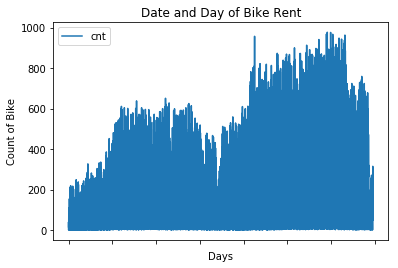

In [4]:
bikedata.plot(x='dteday',y='cnt')
plt.title("Date and Day of Bike Rent")
plt.xlabel("Days")
plt.ylabel("Count of Bike")
plt.show()

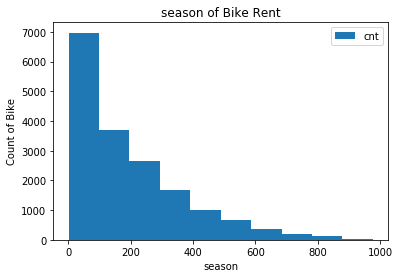

In [5]:
bikedata.plot.hist(x='season',y='cnt')
plt.title("season of Bike Rent")
plt.xlabel("season")
plt.ylabel("Count of Bike")
plt.show()

In [27]:
inputVariables=['dteday','season','yr','mnth','hr','holiday','weekday','workingday','weathersit','temp','atemp','hum','windspeed','casual','registered']
outputVariables=['cnt']

from sklearn.model_selection import train_test_split
x=bikedata[inputVariables]
y=bikedata[outputVariables]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

from sklearn.linear_model import LinearRegression

reg= LinearRegression()
reg.fit(x_train,y_train)

ypred=reg.predict(x_test)
print('Prediction Values  ',ypred)

# manualPrediction
ypredmanual=reg.predict([[1,2,1,1,22,0,6,1,2,0.22,0.33,0.81,0.25,2,2]])
print("Manual Prediction : ",ypredmanual)

Prediction Values   [[  7.]
 [  5.]
 [743.]
 ...
 [ 34.]
 [  7.]
 [371.]]
Manual Prediction :  [[4.]]


In [7]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

bikedata['dteday']=le.fit_transform(bikedata['dteday'])
xDay=bikedata['dteday'].values.reshape(-1, 1)
yDay=bikedata['cnt']
x_trainDay,x_testDay,y_trainDay,y_testDay=train_test_split(xDay,yDay,test_size=0.2,random_state=0)
reg.fit(x_trainDay,y_trainDay)
ypredDay=reg.predict(x_testDay)
print(y_testDay,ypredDay)



3439       7
6542       5
15470    743
9851     208
12640    333
1427     187
15888    124
14772    925
15725    212
1057     161
14430    253
8327     207
10989     64
2972     268
6752     114
10331    501
7274     480
15198    591
4019     275
13759    284
974        5
14464    307
14901      4
15767      6
10549    431
275       33
12805    505
12392    267
12056    243
11765    154
        ... 
8979      59
7801     275
4520     115
2048       8
7563     189
10289    244
5633      30
10429    426
17177    196
8709     245
14999     15
3037     141
6798     179
8910       3
11764    361
13360    223
9427     450
5467     383
6675     459
3079      25
6629     248
11727    302
15723    728
9395     276
4848     125
15249    163
12869    184
5653      34
17313      7
16058    371
Name: cnt, Length: 3476, dtype: int64 [137.6659818  168.40693401 256.37335111 ... 159.65758607 275.05439131
 262.52154156]


In [8]:
xSeason=bikedata['season'].values.reshape(-1, 1)
ySeason=bikedata['cnt'].values.reshape(-1,1)
x_trainSeason,x_testSeason,y_trainSeason,y_testSeason=train_test_split(xSeason,ySeason,test_size=0.2,random_state=0)
reg.fit(x_trainSeason,y_trainSeason)
ypredSeason=reg.predict(x_testSeason)
print(y_testSeason)
print(ypredSeason)


[[  7]
 [  5]
 [743]
 ...
 [ 34]
 [  7]
 [371]]
[[174.43808175]
 [234.34662684]
 [234.34662684]
 ...
 [204.3923543 ]
 [144.48380921]
 [234.34662684]]


In [9]:
xYear=bikedata['yr'].values.reshape(-1, 1)
yYear=bikedata['cnt']
x_trainYear,x_testYear,y_trainYear,y_testYear=train_test_split(xYear,yYear,test_size=0.2,random_state=0)
reg.fit(x_trainYear,y_trainYear)
ypredYear=reg.predict(x_testYear)
print(y_testYear,ypredYear)


3439       7
6542       5
15470    743
9851     208
12640    333
1427     187
15888    124
14772    925
15725    212
1057     161
14430    253
8327     207
10989     64
2972     268
6752     114
10331    501
7274     480
15198    591
4019     275
13759    284
974        5
14464    307
14901      4
15767      6
10549    431
275       33
12805    505
12392    267
12056    243
11765    154
        ... 
8979      59
7801     275
4520     115
2048       8
7563     189
10289    244
5633      30
10429    426
17177    196
8709     245
14999     15
3037     141
6798     179
8910       3
11764    361
13360    223
9427     450
5467     383
6675     459
3079      25
6629     248
11727    302
15723    728
9395     276
4848     125
15249    163
12869    184
5653      34
17313      7
16058    371
Name: cnt, Length: 3476, dtype: int64 [144.80268089 144.80268089 233.55161522 ... 144.80268089 233.55161522
 233.55161522]


In [13]:
xMonth=bikedata['mnth'].values.reshape(-1, 1)
yMonth=bikedata['cnt']
x_trainMonth,x_testMonth,y_trainMonth,y_testMonth=train_test_split(xMonth,yMonth,test_size=0.2,random_state=0)
reg.fit(x_trainMonth,y_trainMonth)
ypredMonth=reg.predict(x_testMonth)
print(y_testMonth,ypredMonth)


3439       7
6542       5
15470    743
9851     208
12640    333
1427     187
15888    124
14772    925
15725    212
1057     161
14430    253
8327     207
10989     64
2972     268
6752     114
10331    501
7274     480
15198    591
4019     275
13759    284
974        5
14464    307
14901      4
15767      6
10549    431
275       33
12805    505
12392    267
12056    243
11765    154
        ... 
8979      59
7801     275
4520     115
2048       8
7563     189
10289    244
5633      30
10429    426
17177    196
8709     245
14999     15
3037     141
6798     179
8910       3
11764    361
13360    223
9427     450
5467     383
6675     459
3079      25
6629     248
11727    302
15723    728
9395     276
4848     125
15249    163
12869    184
5653      34
17313      7
16058    371
Name: cnt, Length: 3476, dtype: int64 [179.27777846 211.9942431  211.9942431  ... 198.90765725 225.08082896
 218.53753603]


In [15]:
xHour=bikedata['hr'].values.reshape(-1, 1)
yHour=bikedata['cnt']
x_trainHour,x_testHour,y_trainHour,y_testHour=train_test_split(xHour,yHour,test_size=0.2,random_state=0)
reg.fit(x_trainHour,y_trainHour)
ypredHour=reg.predict(x_testHour)
print(y_testHour,ypredHour)


3439       7
6542       5
15470    743
9851     208
12640    333
1427     187
15888    124
14772    925
15725    212
1057     161
14430    253
8327     207
10989     64
2972     268
6752     114
10331    501
7274     480
15198    591
4019     275
13759    284
974        5
14464    307
14901      4
15767      6
10549    431
275       33
12805    505
12392    267
12056    243
11765    154
        ... 
8979      59
7801     275
4520     115
2048       8
7563     189
10289    244
5633      30
10429    426
17177    196
8709     245
14999     15
3037     141
6798     179
8910       3
11764    361
13360    223
9427     450
5467     383
6675     459
3079      25
6629     248
11727    302
15723    728
9395     276
4848     125
15249    163
12869    184
5653      34
17313      7
16058    371
Name: cnt, Length: 3476, dtype: int64 [121.78463676 111.45502284 266.39923159 ...  70.13656718 132.11425068
 266.39923159]


In [16]:
xYear=bikedata['holiday'].values.reshape(-1, 1)
yYear=bikedata['cnt']
x_trainYear,x_testYear,y_trainYear,y_testYear=train_test_split(xYear,yYear,test_size=0.2,random_state=0)
reg.fit(x_trainYear,y_trainYear)
ypredYear=reg.predict(x_testYear)
print(y_testYear,ypredYear)


3439       7
6542       5
15470    743
9851     208
12640    333
1427     187
15888    124
14772    925
15725    212
1057     161
14430    253
8327     207
10989     64
2972     268
6752     114
10331    501
7274     480
15198    591
4019     275
13759    284
974        5
14464    307
14901      4
15767      6
10549    431
275       33
12805    505
12392    267
12056    243
11765    154
        ... 
8979      59
7801     275
4520     115
2048       8
7563     189
10289    244
5633      30
10429    426
17177    196
8709     245
14999     15
3037     141
6798     179
8910       3
11764    361
13360    223
9427     450
5467     383
6675     459
3079      25
6629     248
11727    302
15723    728
9395     276
4848     125
15249    163
12869    184
5653      34
17313      7
16058    371
Name: cnt, Length: 3476, dtype: int64 [190.27909044 190.27909044 190.27909044 ... 190.27909044 190.27909044
 190.27909044]


In [17]:
xYear=bikedata['weekday'].values.reshape(-1, 1)
yYear=bikedata['cnt']
x_trainYear,x_testYear,y_trainYear,y_testYear=train_test_split(xYear,yYear,test_size=0.2,random_state=0)
reg.fit(x_trainYear,y_trainYear)
ypredYear=reg.predict(x_testYear)
print(y_testYear,ypredYear)


3439       7
6542       5
15470    743
9851     208
12640    333
1427     187
15888    124
14772    925
15725    212
1057     161
14430    253
8327     207
10989     64
2972     268
6752     114
10331    501
7274     480
15198    591
4019     275
13759    284
974        5
14464    307
14901      4
15767      6
10549    431
275       33
12805    505
12392    267
12056    243
11765    154
        ... 
8979      59
7801     275
4520     115
2048       8
7563     189
10289    244
5633      30
10429    426
17177    196
8709     245
14999     15
3037     141
6798     179
8910       3
11764    361
13360    223
9427     450
5467     383
6675     459
3079      25
6629     248
11727    302
15723    728
9395     276
4848     125
15249    163
12869    184
5653      34
17313      7
16058    371
Name: cnt, Length: 3476, dtype: int64 [195.40162757 189.24428066 191.29672963 ... 185.13938273 195.40162757
 187.1918317 ]


In [18]:
xYear=bikedata['workingday'].values.reshape(-1, 1)
yYear=bikedata['cnt']
x_trainYear,x_testYear,y_trainYear,y_testYear=train_test_split(xYear,yYear,test_size=0.2,random_state=0)
reg.fit(x_trainYear,y_trainYear)
ypredYear=reg.predict(x_testYear)
print(y_testYear,ypredYear)


3439       7
6542       5
15470    743
9851     208
12640    333
1427     187
15888    124
14772    925
15725    212
1057     161
14430    253
8327     207
10989     64
2972     268
6752     114
10331    501
7274     480
15198    591
4019     275
13759    284
974        5
14464    307
14901      4
15767      6
10549    431
275       33
12805    505
12392    267
12056    243
11765    154
        ... 
8979      59
7801     275
4520     115
2048       8
7563     189
10289    244
5633      30
10429    426
17177    196
8709     245
14999     15
3037     141
6798     179
8910       3
11764    361
13360    223
9427     450
5467     383
6675     459
3079      25
6629     248
11727    302
15723    728
9395     276
4848     125
15249    163
12869    184
5653      34
17313      7
16058    371
Name: cnt, Length: 3476, dtype: int64 [181.727812   192.73266807 192.73266807 ... 192.73266807 181.727812
 192.73266807]


In [19]:
xYear=bikedata['weathersit'].values.reshape(-1, 1)
yYear=bikedata['cnt']
x_trainYear,x_testYear,y_trainYear,y_testYear=train_test_split(xYear,yYear,test_size=0.2,random_state=0)
reg.fit(x_trainYear,y_trainYear)
ypredYear=reg.predict(x_testYear)
print(y_testYear,ypredYear)


3439       7
6542       5
15470    743
9851     208
12640    333
1427     187
15888    124
14772    925
15725    212
1057     161
14430    253
8327     207
10989     64
2972     268
6752     114
10331    501
7274     480
15198    591
4019     275
13759    284
974        5
14464    307
14901      4
15767      6
10549    431
275       33
12805    505
12392    267
12056    243
11765    154
        ... 
8979      59
7801     275
4520     115
2048       8
7563     189
10289    244
5633      30
10429    426
17177    196
8709     245
14999     15
3037     141
6798     179
8910       3
11764    361
13360    223
9427     450
5467     383
6675     459
3079      25
6629     248
11727    302
15723    728
9395     276
4848     125
15249    163
12869    184
5653      34
17313      7
16058    371
Name: cnt, Length: 3476, dtype: int64 [206.43527258 206.43527258 206.43527258 ... 206.43527258 165.60380436
 206.43527258]


In [20]:
xYear=bikedata['temp'].values.reshape(-1, 1)
yYear=bikedata['cnt']
x_trainYear,x_testYear,y_trainYear,y_testYear=train_test_split(xYear,yYear,test_size=0.2,random_state=0)
reg.fit(x_trainYear,y_trainYear)
ypredYear=reg.predict(x_testYear)
print(y_testYear,ypredYear)


3439       7
6542       5
15470    743
9851     208
12640    333
1427     187
15888    124
14772    925
15725    212
1057     161
14430    253
8327     207
10989     64
2972     268
6752     114
10331    501
7274     480
15198    591
4019     275
13759    284
974        5
14464    307
14901      4
15767      6
10549    431
275       33
12805    505
12392    267
12056    243
11765    154
        ... 
8979      59
7801     275
4520     115
2048       8
7563     189
10289    244
5633      30
10429    426
17177    196
8709     245
14999     15
3037     141
6798     179
8910       3
11764    361
13360    223
9427     450
5467     383
6675     459
3079      25
6629     248
11727    302
15723    728
9395     276
4848     125
15249    163
12869    184
5653      34
17313      7
16058    371
Name: cnt, Length: 3476, dtype: int64 [212.76060818 167.29328242 167.29328242 ... 235.49427106  99.09229378
 114.24806904]


In [21]:
xYear=bikedata['atemp'].values.reshape(-1, 1)
yYear=bikedata['cnt']
x_trainYear,x_testYear,y_trainYear,y_testYear=train_test_split(xYear,yYear,test_size=0.2,random_state=0)
reg.fit(x_trainYear,y_trainYear)
ypredYear=reg.predict(x_testYear)
print(y_testYear,ypredYear)


3439       7
6542       5
15470    743
9851     208
12640    333
1427     187
15888    124
14772    925
15725    212
1057     161
14430    253
8327     207
10989     64
2972     268
6752     114
10331    501
7274     480
15198    591
4019     275
13759    284
974        5
14464    307
14901      4
15767      6
10549    431
275       33
12805    505
12392    267
12056    243
11765    154
        ... 
8979      59
7801     275
4520     115
2048       8
7563     189
10289    244
5633      30
10429    426
17177    196
8709     245
14999     15
3037     141
6798     179
8910       3
11764    361
13360    223
9427     450
5467     383
6675     459
3079      25
6629     248
11727    302
15723    728
9395     276
4848     125
15249    163
12869    184
5653      34
17313      7
16058    371
Name: cnt, Length: 3476, dtype: int64 [211.78191435 173.52618128 173.52618128 ... 237.28573639  90.61771688
 109.76662617]


In [22]:
xYear=bikedata['hum'].values.reshape(-1, 1)
yYear=bikedata['cnt']
x_trainYear,x_testYear,y_trainYear,y_testYear=train_test_split(xYear,yYear,test_size=0.2,random_state=0)
reg.fit(x_trainYear,y_trainYear)
ypredYear=reg.predict(x_testYear)
print(y_testYear,ypredYear)


3439       7
6542       5
15470    743
9851     208
12640    333
1427     187
15888    124
14772    925
15725    212
1057     161
14430    253
8327     207
10989     64
2972     268
6752     114
10331    501
7274     480
15198    591
4019     275
13759    284
974        5
14464    307
14901      4
15767      6
10549    431
275       33
12805    505
12392    267
12056    243
11765    154
        ... 
8979      59
7801     275
4520     115
2048       8
7563     189
10289    244
5633      30
10429    426
17177    196
8709     245
14999     15
3037     141
6798     179
8910       3
11764    361
13360    223
9427     450
5467     383
6675     459
3079      25
6629     248
11727    302
15723    728
9395     276
4848     125
15249    163
12869    184
5653      34
17313      7
16058    371
Name: cnt, Length: 3476, dtype: int64 [113.39937204 113.39937204 224.03147096 ... 158.25022295 167.22039314
 209.08118732]


In [23]:
xYear=bikedata['windspeed'].values.reshape(-1, 1)
yYear=bikedata['cnt']
x_trainYear,x_testYear,y_trainYear,y_testYear=train_test_split(xYear,yYear,test_size=0.2,random_state=0)
reg.fit(x_trainYear,y_trainYear)
ypredYear=reg.predict(x_testYear)
print(y_testYear,ypredYear)


3439       7
6542       5
15470    743
9851     208
12640    333
1427     187
15888    124
14772    925
15725    212
1057     161
14430    253
8327     207
10989     64
2972     268
6752     114
10331    501
7274     480
15198    591
4019     275
13759    284
974        5
14464    307
14901      4
15767      6
10549    431
275       33
12805    505
12392    267
12056    243
11765    154
        ... 
8979      59
7801     275
4520     115
2048       8
7563     189
10289    244
5633      30
10429    426
17177    196
8709     245
14999     15
3037     141
6798     179
8910       3
11764    361
13360    223
9427     450
5467     383
6675     459
3079      25
6629     248
11727    302
15723    728
9395     276
4848     125
15249    163
12869    184
5653      34
17313      7
16058    371
Name: cnt, Length: 3476, dtype: int64 [194.06154938 161.97437584 181.22094755 ... 176.95030096 176.95030096
 194.06154938]


In [24]:
xYear=bikedata['casual'].values.reshape(-1, 1)
yYear=bikedata['cnt']
x_trainYear,x_testYear,y_trainYear,y_testYear=train_test_split(xYear,yYear,test_size=0.2,random_state=0)
reg.fit(x_trainYear,y_trainYear)
ypredYear=reg.predict(x_testYear)
print(y_testYear,ypredYear)


3439       7
6542       5
15470    743
9851     208
12640    333
1427     187
15888    124
14772    925
15725    212
1057     161
14430    253
8327     207
10989     64
2972     268
6752     114
10331    501
7274     480
15198    591
4019     275
13759    284
974        5
14464    307
14901      4
15767      6
10549    431
275       33
12805    505
12392    267
12056    243
11765    154
        ... 
8979      59
7801     275
4520     115
2048       8
7563     189
10289    244
5633      30
10429    426
17177    196
8709     245
14999     15
3037     141
6798     179
8910       3
11764    361
13360    223
9427     450
5467     383
6675     459
3079      25
6629     248
11727    302
15723    728
9395     276
4848     125
15249    163
12869    184
5653      34
17313      7
16058    371
Name: cnt, Length: 3476, dtype: int64 [108.03313922 100.32322384 305.9209674  ... 131.16288537  97.75325204
 136.30282896]


In [25]:
xYear=bikedata['registered'].values.reshape(-1, 1)
yYear=bikedata['cnt']
x_trainYear,x_testYear,y_trainYear,y_testYear=train_test_split(xYear,yYear,test_size=0.2,random_state=0)
reg.fit(x_trainYear,y_trainYear)
ypredYear=reg.predict(x_testYear)
print(y_testYear,ypredYear)


3439       7
6542       5
15470    743
9851     208
12640    333
1427     187
15888    124
14772    925
15725    212
1057     161
14430    253
8327     207
10989     64
2972     268
6752     114
10331    501
7274     480
15198    591
4019     275
13759    284
974        5
14464    307
14901      4
15767      6
10549    431
275       33
12805    505
12392    267
12056    243
11765    154
        ... 
8979      59
7801     275
4520     115
2048       8
7563     189
10289    244
5633      30
10429    426
17177    196
8709     245
14999     15
3037     141
6798     179
8910       3
11764    361
13360    223
9427     450
5467     383
6675     459
3079      25
6629     248
11727    302
15723    728
9395     276
4848     125
15249    163
12869    184
5653      34
17313      7
16058    371
Name: cnt, Length: 3476, dtype: int64 [ 13.77794481  14.942754   781.38720513 ...  34.74451034  18.43718159
 424.95559108]


In [10]:

bikedata

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,0,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,0,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,0,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,0,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,0,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,0,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,0,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,0,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,0,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14
